<center><h1> Case Study 4</h1></center>
<center><h3> Week 4 (out of 5)</h3></center>

**Author(s):**
1. Robin Fu (robin.fu@emory.edu)
 
**Data Source**: http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html
 
**Book**: [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge

**Data**:

```
INFMRT.DTA

year      infmort   afdcprt   popul     pcinc     physic    afdcper   d90      
lpcinc    lphysic   DC        lpopul    

  Obs:   102

  1. year                     1987 or 1990
  2. infmort                  infant mortality rate
  3. afdcprt                  AFDC participation, 1000s
  4. popul                    population, 1000s
  5. pcinc                    per capita income
  6. physic                   Drs. per 100,000 civilian pop.
  7. afdcper                  percent on AFDC
  8. d90                      =1 if year == 1990
  9. lpcinc                   log(pcinc)
 10. lphysic                  log(physic)
 11. DC                       =1 for Washington DC
 12. lpopul                   log(popul)
 ```

1. [5 points] Download the relevant data set from the data source above, and create two local copies as follows: `infmrt_87` and `infmrt_90` contain the sub-samples of observations corresponding to years 1987 and 1990 respectively.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/infmrt.dta')

infmrt_87 = data[data['year'] == 1987].reset_index()
infmrt_90 = data[data['year'] == 1990].reset_index()

In [2]:
infmrt_87.head()

,index,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul
0,0,1987.0,8.3,52.0,1186.0,13996.0,173.0,4.384486,0.0,9.546527,5.153292,0.0,7.078341
1,2,1987.0,7.8,11.0,1056.0,18083.0,186.0,1.041667,0.0,9.802728,5.225747,0.0,6.962244
2,4,1987.0,8.5,20.0,547.0,14267.0,244.0,3.656307,0.0,9.565704,5.497168,0.0,6.304449
3,6,1987.0,7.2,234.0,5856.0,19131.0,322.0,3.995902,0.0,9.859065,5.774551,0.0,8.675222
4,8,1987.0,8.4,42.0,986.0,15683.0,244.0,4.259635,0.0,9.660333,5.497168,0.0,6.893656


In [3]:
infmrt_90.head()

,index,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul
0,1,1990.0,6.2,62.0,1228.0,17125.0,178.0,5.048860,1.0,9.748295,5.181784,0.0,7.113142
1,3,1990.0,7.1,21.0,1109.0,21051.0,200.0,1.893598,1.0,9.954703,5.298317,0.0,7.011214
2,5,1990.0,6.4,25.0,563.0,17630.0,253.0,4.440497,1.0,9.777357,5.533390,0.0,6.333280
3,7,1990.0,7.0,282.0,6016.0,22558.0,337.0,4.687500,1.0,10.023840,5.820083,0.0,8.702178
4,9,1990.0,8.1,52.0,1003.0,18771.0,254.0,5.184447,1.0,9.840069,5.537334,0.0,6.910751


2. [30 points] Using the `pcinc`, `physic`, and the `popul` features, please proceed to implement the $K$-Means Algorithm using each of the previously created data sets where $K$, the number of clusters, is chosen by the elbow method (you are expected to provide a visualization for each case). **Hint**: As discussed in the lectures, taking natural logarithm is just one possible pre-processing transformation, you can also apply classical standardization. Please use the 42 seed and at least 25 initial random starting points.

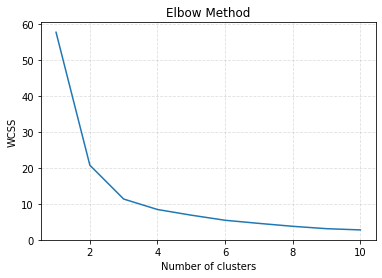

In [4]:
import patsy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Infmrt 87 Data Set
X = patsy.dmatrix('-1 + lpcinc + lphysic + lpopul', data=infmrt_87, return_type='dataframe')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=250, n_init=30, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Use n_clusters = 3 as deemed optimal via elbow method
kbest87 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 250, n_init = 30, random_state = 42).fit(X)

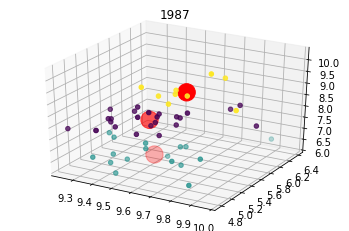

In [5]:
#Create 3D Scatterplot for Infmrt 87
ax = plt.figure().add_subplot(111, projection = '3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c = kbest87.labels_.astype(float))
ax.grid(alpha = 0.4, linestyle = '--')
ax.scatter(kbest87.cluster_centers_[:, 0],kbest87.cluster_centers_[:, 1],kbest87.cluster_centers_[:, 2],s=300, c='red')
plt.title('1987')
plt.show()

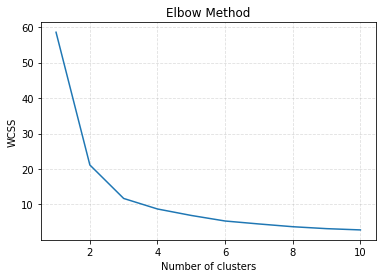

In [6]:
#Infmrt 90 Data Set
X = patsy.dmatrix('-1 + lpcinc + lphysic + lpopul', data=infmrt_90, return_type='dataframe')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=250, n_init=30, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Use n_clusters = 3 as deemed optimal via elbow method
kbest90 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 250, n_init = 30, random_state = 42).fit(X)

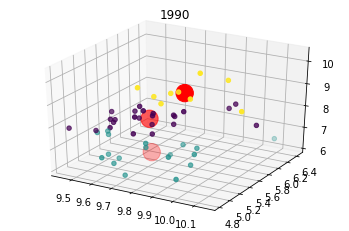

In [7]:
#Create 3D Scatterplot for Infmrt 90
ax = plt.figure().add_subplot(111, projection = '3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c = kbest90.labels_.astype(float))
ax.grid(alpha = 0.4, linestyle = '--')
ax.scatter(kbest90.cluster_centers_[:, 0],kbest90.cluster_centers_[:, 1],kbest90.cluster_centers_[:, 2],s=300, c='red')
plt.title('1990')
plt.show()

3. [30 points] Create the relevant dummy variables that identify the class your $K$-Means clustering algorithm identifies each observation to belong to in each data set, i.e., if for example you found out that $K=3$ for `infmrt_87`, then create new variables `d1`, `d2`, and `d3` in `infmrt_87` where `dj` equals 1 if an observation belong to class `j` as identified by your clustering algorithm, and zero otherwise. Do the same for the `infmrt_90`.

In [8]:
#Infmrt 87 Data Set
dummies = pd.get_dummies(kbest87.labels_ + 1)
infmrt_87['d'] = kbest87.labels_ + 1 #Adding for convenience with groupby function below
infmrt_87[['d1','d2','d3']] = dummies
infmrt_87.head()

,index,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul,d,d1,d2,d3
0,0,1987.0,8.3,52.0,1186.0,13996.0,173.0,4.384486,0.0,9.546527,5.153292,0.0,7.078341,2,0,1,0
1,2,1987.0,7.8,11.0,1056.0,18083.0,186.0,1.041667,0.0,9.802728,5.225747,0.0,6.962244,2,0,1,0
2,4,1987.0,8.5,20.0,547.0,14267.0,244.0,3.656307,0.0,9.565704,5.497168,0.0,6.304449,2,0,1,0
3,6,1987.0,7.2,234.0,5856.0,19131.0,322.0,3.995902,0.0,9.859065,5.774551,0.0,8.675222,1,1,0,0
4,8,1987.0,8.4,42.0,986.0,15683.0,244.0,4.259635,0.0,9.660333,5.497168,0.0,6.893656,2,0,1,0


In [9]:
#Infmrt 90 Data Set
dummies = pd.get_dummies(kbest90.labels_ + 1)
infmrt_90['d'] = kbest90.labels_ + 1 #Adding for convenience with groupby function below
infmrt_90[['d1','d2','d3']] = dummies
infmrt_90.head()

,index,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul,d,d1,d2,d3
0,1,1990.0,6.2,62.0,1228.0,17125.0,178.0,5.048860,1.0,9.748295,5.181784,0.0,7.113142,2,0,1,0
1,3,1990.0,7.1,21.0,1109.0,21051.0,200.0,1.893598,1.0,9.954703,5.298317,0.0,7.011214,2,0,1,0
2,5,1990.0,6.4,25.0,563.0,17630.0,253.0,4.440497,1.0,9.777357,5.533390,0.0,6.333280,2,0,1,0
3,7,1990.0,7.0,282.0,6016.0,22558.0,337.0,4.687500,1.0,10.023840,5.820083,0.0,8.702178,1,1,0,0
4,9,1990.0,8.1,52.0,1003.0,18771.0,254.0,5.184447,1.0,9.840069,5.537334,0.0,6.910751,2,0,1,0


4. [30 points] Using the newly created dummy variables in part 3 above (or otherwise) create a table where each row represents a class category (as found by your $K$-Means clustering algorithm), and two columns one for `infmort` and `afdcprt`. Please report within each cell the corresponding average of these two variables within the observations belonging to each cluster. Do this for both data sets.

In [10]:
infmrt_87.groupby(['d']).mean()[['infmort','afdcprt']]

,infmort,afdcprt
d,,
1,10.376000,152.800003
2,9.800000,30.117647
3,10.088889,707.111084


In [11]:
infmrt_90.groupby(['d']).mean()[['infmort','afdcprt']]

,infmort,afdcprt
d,,
1,9.383333,176.916672
2,9.072223,38.500000
3,9.444445,779.555542


5. [5 points] Please comment on the tables you just created in part 4 above. Is there any systematic relationship between `infmort` and `afdcprt` accross classes and between years?

In both the 1987 and 1990 data set, the K-means algorithim found that there are 3 typical categories (i.e. Category 1, 2, and 3) of states. <br> <br>
Category 1 states initially had the highest levels of infant mortality and moderate levels of participation in AFDC programs. Category 2 states initially had the lowest levels of infant mortality and lowest levels of participation in AFDC programs. Lastly, Category 3 states had moderate levels of infant mortality and the highest levels of participation in AFDC programs. <br><br>
We notice that Category 3 has the highest infant mortality rates in spite of having the highest levels of participation in afdc programs. This suggests that support to Category 3 AFDC programs (and potentially a host of other programs) is lacking in comparison to the other programs, leading to the relative ineffectiveness of AFDC programs in reducing infant mortality in those states. <br>
Consider the table below:

In [12]:
infdict = {'1987': infmrt_87.groupby(['d']).mean().loc[:,'infmort'].values, 
           '1990': infmrt_90.groupby(['d']).mean().loc[:,'infmort'].values}
deltainf = pd.DataFrame(data = infdict).rolling(1).sum().pct_change(axis=1)['1990']

afdict = {'1987': infmrt_87.groupby(['d']).mean().loc[:,'afdcprt'].values, 
           '1990': infmrt_90.groupby(['d']).mean().loc[:,'afdcprt'].values}
deltafdc = pd.DataFrame(data = afdict).rolling(1).sum().pct_change(axis=1)['1990']

delta = pd.concat([deltainf,deltafdc],axis = 1)
delta.index = ['1','2','3']
delta.columns = ['infmort','afdcprt']
delta['perc'] = delta.infmort/delta.afdcprt
delta

,infmort,afdcprt,perc
1,-0.095670,0.157832,-0.606149
2,-0.074263,0.278320,-0.266826
3,-0.063877,0.102451,-0.623483


We now consider percentage changes in infant mortality and AFDC participation over the years. In the table above, infmort and afdcprt represent the respective percentage change in infant mortality and AFDC participation. The column "perc" represents change in infant mortality divided by percentage change in afdcprt (effectively the infant mortality elasticity relative to AFDC participation). <br> <br>
Here, we see that both Category 1 and Category 3 had similar results in that an increase in afdcprt had a comparable decrease in infmort. Category 2 is much lower in that increasing afdcprt had a much less significant effect in decreasing infant mortality compared to the other two. This could be due to a number of factors. One possible explanation we will consider is that Category 2 is already fairly well resourced such that increasing participation in AFDC participation has minimal effects on infant mortality. This would be supported by the flat numbers above as well. <br> <br>
Regardless, based on these results, we can see that there is a relationship betwen infmort and afdcprt across both the classes and the years.